Este notebook de buscar o melhor algoritmo de preenchimento dos dados. Logo, é seguido dois testes:

1. Faço o método de precheechimento dos dados com a base toda e avalio com 
    + Viés Percentual;
    + Erro Quadrático Médio;
    + Erro Médio Absoluto.
2. Retiro partes de um dataset original (2 messes, no caso) que não possua valores NaN(faltantes) e uso um algoritmo simples de previsão que é o ExponentialSmoothing da stastmodels. Faço o mesmo procedimento, mas antes retiro valores aleatorimente dessa base e preencho utilizando os métodos. Com os modelos previstos tanto para série original quanto para serie preenchida, avalio com o método acima lista no ponto anterior.


Contudo, pego os resultados do VP(Viés Percentual), MQE(Erro Quadrático Médio) e MAE(Erro Médio Absoluto) tanto da para base de dados original quanto para a preenchida, faço a diferença entre os resultados e se der uma diferença muito grande é porque aquele método de preecheencimento colocou valores muito diferentes ou que não ia condizer se tivesse um valor inserido. Com isso, gerará vários resultados, então para isso foi utilizado um gráfico boxplot para verificar visualmente se os valores estão muito variados, ou seja, um boxplot muito grande nos diz que há valores muito variados então o método de preenchimento não é bom para aquela base.

# Imports de bibliotecas

In [3]:
import math
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import metodos_imputacao as m_imputacao

mimputacao = m_imputacao.metodos_de_imputacao()
warnings.filterwarnings('ignore')

# Upload das bases

In [4]:
# Bases de Cerqueira Cesar 

ccesar_16 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2016.csv').reset_index(drop=True).iloc[:-1,:]
ccesar_17 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2017.csv').reset_index(drop=True)
ccesar_18 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2018.csv').reset_index(drop=True)
ccesar_19 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2019.csv').reset_index(drop=True)
ccesar_20 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base de Congonhas

congonhas_16 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2016.csv').reset_index(drop=True).iloc[:-1,:]
congonhas_17 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2017.csv').reset_index(drop=True)
congonhas_18 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2018.csv').reset_index(drop=True)
congonhas_19 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2019.csv').reset_index(drop=True)
congonhas_20 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base de Mooca

mooca_16 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2016.csv').reset_index(drop=True).iloc[:-1,:]
mooca_17 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2017.csv').reset_index(drop=True)
mooca_18 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2018.csv').reset_index(drop=True)
mooca_19 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2019.csv').reset_index(drop=True)
mooca_20 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base Parque Pedro II

ppredo_16 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2016.csv').reset_index(drop=True).iloc[:-1,:]
ppredo_17 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2017.csv').reset_index(drop=True)
ppredo_18 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2018.csv').reset_index(drop=True)
ppredo_19 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2019.csv').reset_index(drop=True)
ppredo_20 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base Pinheiros 

pinheiros_16 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2016.csv').reset_index(drop=True).iloc[:-1,:]
pinheiros_17 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2017.csv').reset_index(drop=True)
pinheiros_18 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2018.csv').reset_index(drop=True)
pinheiros_19 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2019.csv').reset_index(drop=True)
pinheiros_20 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2020.csv').reset_index(drop=True).iloc[:-1,:]

In [5]:
xeque_mate = pd.DataFrame({'Cesar':['',''],'Congonhas':['',''],
                           'Mooca':['',''],'Parque Pedro II':['',''],
                           'Pinheiros':['','']})

# Verificar o melhor método de imputação com uma base completa
Verificar a variação dos dados estatísitcos das estações mais distantes

## Base de dados de Cerqueira Cesar

In [6]:
mes_null = pd.DataFrame([[np.nan]*24 for i in range(365-pinheiros_16.shape[0])], columns=[str(i) for i in range(1,25)])
pinheiros_16 = pd.concat([pinheiros_16, mes_null], axis='rows')

2016=>5.83% dos dados da bases são faltantes
2017=>9.69% dos dados da bases são faltantes
2018=>7.43% dos dados da bases são faltantes
2019=>11.89% dos dados da bases são faltantes
2020=>44.36% dos dados da bases são faltantes


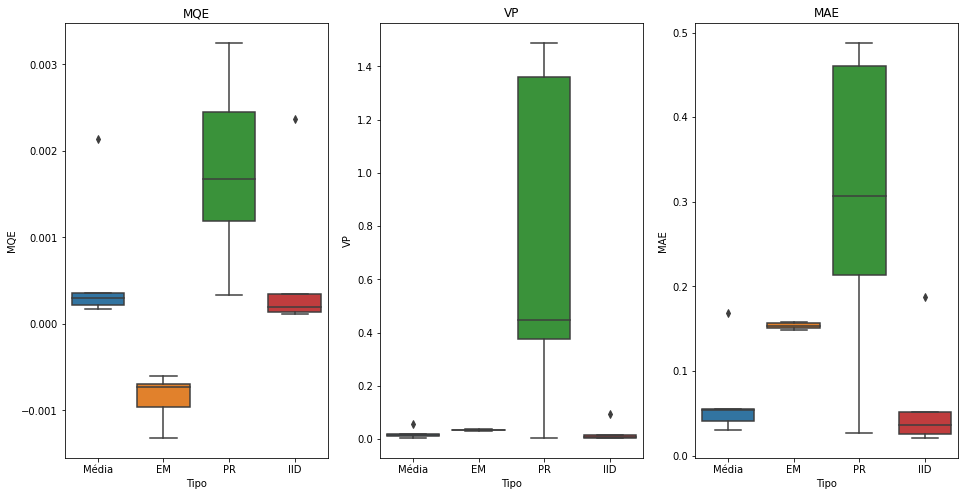

In [5]:
Cerqueira_Cesar_16 = [ccesar_16,congonhas_16,mooca_16,ppredo_16,pinheiros_16]
Cerqueira_Cesar_17 = [ccesar_17,congonhas_17,mooca_17,ppredo_17,pinheiros_17]
Cerqueira_Cesar_18 = [ccesar_18,congonhas_18,mooca_18,ppredo_18,pinheiros_18]
Cerqueira_Cesar_19 = [ccesar_19,congonhas_19,mooca_19,ppredo_19,pinheiros_19]
Cerqueira_Cesar_20 = [ccesar_20,congonhas_20,mooca_20,ppredo_20,pinheiros_20]    

dfs = [ccesar_16,ccesar_17,ccesar_18,ccesar_19,ccesar_20]
raio_ccessar       = [7,7.4,4.7,3]

dfs_raio = [Cerqueira_Cesar_16,
            Cerqueira_Cesar_17,
            Cerqueira_Cesar_18,
            Cerqueira_Cesar_19,
            Cerqueira_Cesar_20]  

mimputacao.verficar_melhor_metodo(dfs,dfs_raio,raio_ccessar)
xeque_mate['Cesar'] = 'EM'

Verificando pelos resultados acima, podemos ver que o método de preenchimento **EM(Expected Maximization)** foi o mais apropriado para a base de dados da estação **Cerqueira Cesar**, pois apresentou uma boxplot muito pequeno que nos diz que houve pouca variação nos resultados.

## Base de dados de Congonhas

2016=>20.34% dos dados da bases são faltantes
2017=>5.54% dos dados da bases são faltantes
2018=>4.09% dos dados da bases são faltantes
2019=>3.28% dos dados da bases são faltantes
2020=>8.03% dos dados da bases são faltantes


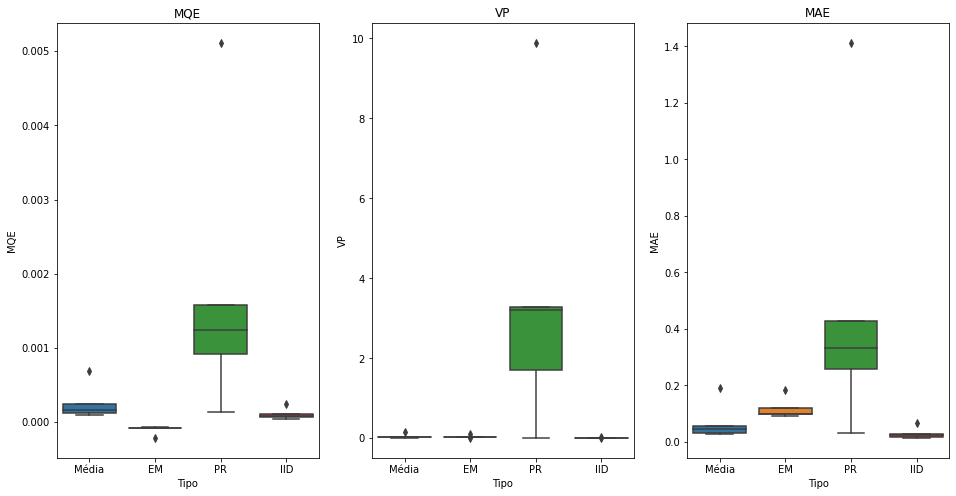

In [6]:
raio_congonhas = [7.3,7,8.73]
Congonhas_16 = [congonhas_16,pinheiros_16,ccesar_16,ppredo_16]
Congonhas_17 = [congonhas_17,pinheiros_17,ccesar_17,ppredo_17]
Congonhas_18 = [congonhas_18,pinheiros_18,ccesar_18,ppredo_18]
Congonhas_19 = [congonhas_19,pinheiros_19,ccesar_19,ppredo_19]
Congonhas_20 = [congonhas_20,pinheiros_20,ccesar_20,ppredo_20]
dfs = [congonhas_16,congonhas_17,congonhas_18,congonhas_19,congonhas_20]
dfs_raio = [Congonhas_16,Congonhas_17,Congonhas_18,Congonhas_19,Congonhas_20]
mimputacao.verficar_melhor_metodo(dfs,dfs_raio,raio_congonhas)
xeque_mate['Congonhas'] = 'EM'

Verificando pelos resultados acima, podemos ver que o método de preenchimento **EM** foi o mais apropriado para a base de dados da estação **Congonhas**, pois apresentou uma boxplot muito pequeno que nos diz que houve pouca variação nos resultados.

## Base de dados de Mooca

2016=>6.58% dos dados da bases são faltantes
2017=>7.59% dos dados da bases são faltantes
2018=>14.97% dos dados da bases são faltantes
2019=>12.44% dos dados da bases são faltantes
2020=>16.53% dos dados da bases são faltantes


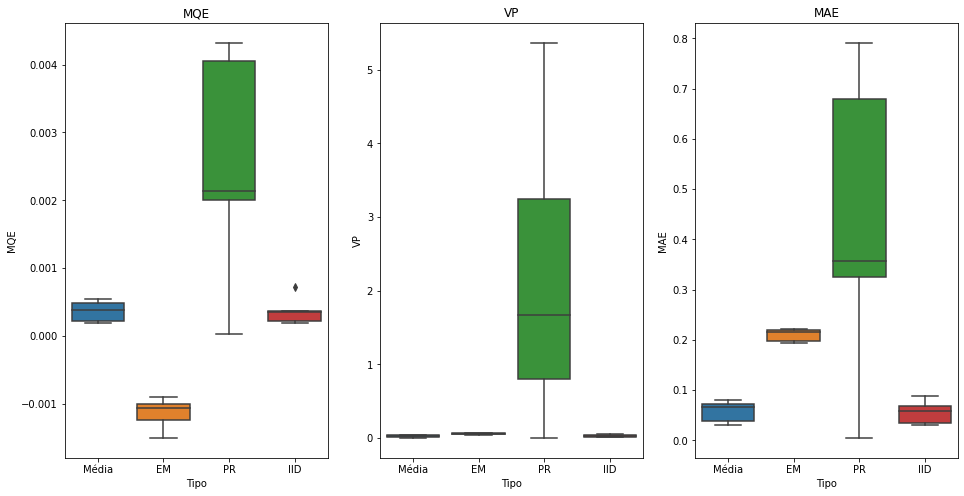

In [7]:
raio_Mooca = [2.84,7.33]
Mooca_16   = [mooca_16,pinheiros_16,ccesar_16]
Mooca_17   = [mooca_17,pinheiros_17,ccesar_17]
Mooca_18   = [mooca_18,pinheiros_18,ccesar_18]
Mooca_19   = [mooca_19,pinheiros_19,ccesar_19]
Mooca_20   = [mooca_20,pinheiros_20,ccesar_20]
dfs = [mooca_16,mooca_17,mooca_18,mooca_19,mooca_20]
dfs_raio = [Mooca_16,Mooca_17,Mooca_18,Mooca_19,Mooca_20]
mimputacao.verficar_melhor_metodo(dfs,dfs_raio,raio_Mooca)
xeque_mate['Mooca'] = 'EM'

Verificando pelos resultados acima, podemos ver que o método de preenchimento **EM** foi o mais apropriado para a base de dados da estação **Mooca**, pois apresentou uma boxplot muito pequeno que nos diz que houve pouca variação nos resultados.

## Base de dados Parque Pedro II

2016=>11.28% dos dados da bases são faltantes
2017=>14.57% dos dados da bases são faltantes
2018=>5.96% dos dados da bases são faltantes
2019=>7.31% dos dados da bases são faltantes
2020=>6.56% dos dados da bases são faltantes


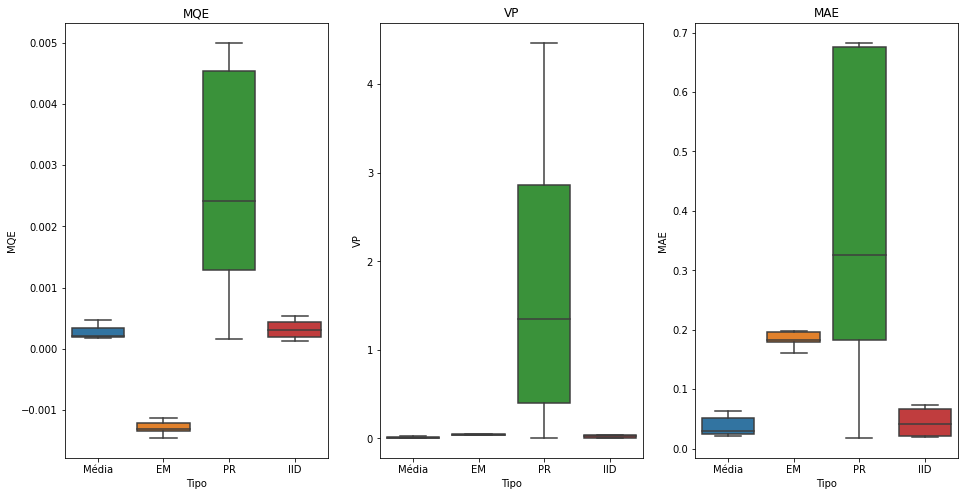

In [8]:
Parque_Pedro_II_16 = [ppredo_16,mooca_16,ccesar_16,pinheiros_16,congonhas_16]
Parque_Pedro_II_17 = [ppredo_17,mooca_17,ccesar_17,pinheiros_17,congonhas_17]
Parque_Pedro_II_18 = [ppredo_18,mooca_18,ccesar_18,pinheiros_18,congonhas_18]
Parque_Pedro_II_19 = [ppredo_19,mooca_19,ccesar_19,pinheiros_19,congonhas_19]
Parque_Pedro_II_20 = [ppredo_20,mooca_20,ccesar_20,pinheiros_20,congonhas_20]
raio_parque_pedro_II = [2.81,4.68,7.73,8.71]

dfs = [ppredo_16,ppredo_17,ppredo_18,ppredo_19,ppredo_20]
dfs_raio = [Parque_Pedro_II_16,Parque_Pedro_II_17,Parque_Pedro_II_18,Parque_Pedro_II_19,Parque_Pedro_II_20]
mimputacao.verficar_melhor_metodo(dfs,dfs_raio,raio_parque_pedro_II)
xeque_mate['Parque Pedro II'] = 'EM'

Verificando pelos resultados acima, podemos ver que o método de preenchimento **EM(Expected Maximization)** foi o mais apropriado para a base de dados da estação **Parque Pedro II**, pois apresentou uma boxplot muito pequeno que nos diz que houve pouca variação nos resultados.

## Base de dados de Pinheiros 

2016=>17.97% dos dados da bases são faltantes
2017=>8.12% dos dados da bases são faltantes
2018=>18.34% dos dados da bases são faltantes
2019=>4.63% dos dados da bases são faltantes
2020=>4.92% dos dados da bases são faltantes


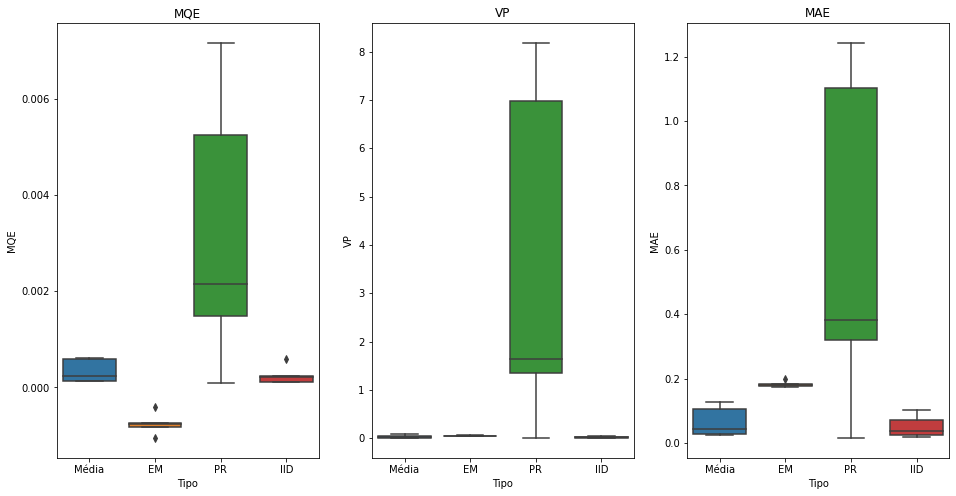

In [9]:
Pinheiros_16   = [pinheiros_16,ccesar_16,ppredo_16,congonhas_16]
Pinheiros_17   = [pinheiros_17,ccesar_17,ppredo_17,congonhas_17]
Pinheiros_18   = [pinheiros_18,ccesar_18,ppredo_18,congonhas_18]
Pinheiros_19   = [pinheiros_19,ccesar_19,ppredo_19,congonhas_19]
Pinheiros_20   = [pinheiros_20,ccesar_20,ppredo_20,congonhas_20]
dfs = [pinheiros_16,pinheiros_17,pinheiros_18,pinheiros_19,pinheiros_20]
dfs_raio = [Pinheiros_16,Pinheiros_17,Pinheiros_18,Pinheiros_19,Pinheiros_20]
raio_pinheiros = [3.15,7.76,7.26]
mimputacao.verficar_melhor_metodo(dfs,dfs_raio,raio_pinheiros)
xeque_mate['Pinheiros'] = 'IID'

Verificando pelos resultados acima, podemos ver que o método de preenchimento **IID(Interpolação do inverso da distância)** foi o mais apropriado para a base de dados da estação **Pinheiros**, pois apresentou uma boxplot muito pequeno que nos diz que houve pouca variação nos resultados.

# Verificar do melhor método de imputação com um simples modelo de regressão linear com parte da base completa.

1. Procurar uma parte da base sem NaN; 
2. Copiar essa parte; 
3. Retirar aleatoriamente;
4. Aplicar método de imputação de dados;
5. Aplicar simples Modelo de regressão; 
6. Verificar qual melhor pelo VP,MAE e MQE. 

## Base de dados de Cerqueira Cesar

In [10]:
cerqueira_cesar = pd.concat([mimputacao.random_nan(mimputacao.random_rows(ccesar_16,60),0.05),
                             mimputacao.random_nan(mimputacao.random_rows(ccesar_17,60),0.05),
                             mimputacao.random_nan(mimputacao.random_rows(ccesar_18,60),0.05),
                             mimputacao.random_nan(mimputacao.random_rows(ccesar_19,60),0.05),
                             mimputacao.random_nan(mimputacao.random_rows(ccesar_20,60),0.05)])
cerqueira_cesar.reset_index(drop=True,inplace=True)

raio_ccessar    = [7,7.4,4.7,3]
Cerqueira_cesar = [cerqueira_cesar,
                   mimputacao.concatena([mimputacao.random_rows(mooca_16,60),
                                         mimputacao.random_rows(mooca_17,60),
                                         mimputacao.random_rows(mooca_18,60),
                                         mimputacao.random_rows(mooca_19,60),
                                         mimputacao.random_rows(mooca_20,60)]),
                   
                   mimputacao.concatena([mimputacao.random_rows(ppredo_16,60),
                                         mimputacao.random_rows(ppredo_17,60),
                                         mimputacao.random_rows(ppredo_18,60),
                                         mimputacao.random_rows(ppredo_19,60),
                                         mimputacao.random_rows(ppredo_20,60)]),               
                   
                   mimputacao.concatena([mimputacao.random_rows(congonhas_16,60),
                                         mimputacao.random_rows(congonhas_17,60),
                                         mimputacao.random_rows(congonhas_18,60),
                                         mimputacao.random_rows(congonhas_19,60),
                                         mimputacao.random_rows(congonhas_20,60)]),
                   
                   mimputacao.concatena([mimputacao.random_rows(pinheiros_16,60),
                                         mimputacao.random_rows(pinheiros_17,60),
                                         mimputacao.random_rows(pinheiros_18,60),
                                         mimputacao.random_rows(pinheiros_19,60),
                                         mimputacao.random_rows(pinheiros_20,60)])]

media_completados,a,b,c = mimputacao.completa_serie_Media(cerqueira_cesar)
em_completados,a,b,c    = mimputacao.completa_serie_EM(cerqueira_cesar)
pr_completados,a,b,c    = mimputacao.completa_serie_ponderacao_regional(Cerqueira_cesar)
iid_completados,a,b,c   = mimputacao.completa_serie_IID(Cerqueira_cesar,raio_ccessar)

resultados_media = mimputacao.testa_melhor_metodo(media_completados,cerqueira_cesar,'additive')
resultados_em    = mimputacao.testa_melhor_metodo(em_completados+1,cerqueira_cesar ,'additive')
resultados_pr    = mimputacao.testa_melhor_metodo(pr_completados,cerqueira_cesar   ,'additive')
resultados_iid   = mimputacao.testa_melhor_metodo(iid_completados,cerqueira_cesar  , 'additive')

resultados = pd.concat([resultados_media,resultados_em,resultados_pr,resultados_iid])
tipo = []
rows = resultados_media.shape[0]
for  i in [['Media' for _ in range(rows)],['EM' for _ in range(rows)],['PR' for _ in range(rows)],['IID' for _ in range(rows)]]:
    for j in i:
        tipo.append(j)

resultados['Tipo'] = tipo
resultados.reset_index(drop=True,inplace=True)

resultados['MQE'].loc[resultados['MQE']> 1] = 1
resultados['MQE'].loc[resultados['MQE']<-1] =-1
resultados['VP'] .loc[resultados['VP'] > 1] = 1
resultados['VP'] .loc[resultados['VP'] <-1] =-1
resultados['MAE'].loc[resultados['MAE']> 1] = 1
resultados['MAE'].loc[resultados['MAE']<-1] =-1

fig, axes = plt.subplots(1,3,sharex=True, figsize=(16,8))
sns.boxplot(ax=axes[0],x="Tipo", y="MQE", data=resultados)
axes[0].set_title("MQE")

sns.boxplot(ax=axes[1],x="Tipo", y="VP" , data=resultados)
axes[1].set_title("VP")

sns.boxplot(ax=axes[2],x="Tipo", y="MAE", data=resultados)
axes[2].set_title("MAE")
plt.show()
xeque_mate.iloc[1,0] = 'EM'

IndexError: list index out of range

Verificando pelos resultados acima, podemos ver que o método de preenchimento **EM(Expected Maximization)** foi o mais apropriado para a base de dados da estação **Cerqueira Cesar**, pois apresentou uma boxplot muito pequeno que nos diz que houve pouca variação nos resultados.

## Base de dados de Congonhas

In [11]:
congonhas = pd.concat([mimputacao.random_nan(mimputacao.random_rows(mooca_16,60),0.05),
                       mimputacao.random_nan(mimputacao.linha_no_nan(mooca_17),0.05),
                       mimputacao.random_nan(mimputacao.linha_no_nan(mooca_18),0.05),
                       mimputacao.random_nan(mimputacao.linha_no_nan(mooca_19),0.05),
                       mimputacao.random_nan(mimputacao.linha_no_nan(mooca_20),0.05)])
congonhas.reset_index(drop=True,inplace=True)

raio_congonhas = [7.3,7,8.73]
Congonhas   = [congonhas,
               mimputacao.concatena([mimputacao.random_rows(pinheiros_16,60),
                          mimputacao.random_rows(pinheiros_17,60),
                          mimputacao.random_rows(pinheiros_18,60),
                          mimputacao.random_rows(pinheiros_19,60),
                          mimputacao.random_rows(pinheiros_20,60)]),               
               mimputacao.concatena([mimputacao.random_rows(ccesar_16,60),
                          mimputacao.random_rows(ccesar_17,60),
                          mimputacao.random_rows(ccesar_18,60),
                          mimputacao.random_rows(ccesar_19,60),
                          mimputacao.random_rows(ccesar_20,60)]),
               mimputacao.concatena([mimputacao.random_rows(ppredo_16,60),
                          mimputacao.random_rows(ppredo_17,60),
                          mimputacao.random_rows(ppredo_18,60),
                          mimputacao.random_rows(ppredo_19,60),
                          mimputacao.random_rows(ppredo_20,60)])]

media_completados,a,b,c = mimputacao.completa_serie_Media(congonhas)
em_completados,a,b,c    = mimputacao.completa_serie_EM(congonhas)
pr_completados,a,b,c    = mimputacao.completa_serie_ponderacao_regional(Congonhas)
iid_completados,a,b,c   = mimputacao.completa_serie_IID(Congonhas,raio_congonhas)

resultados_media = mimputacao.testa_melhor_metodo(media_completados,congonhas,'additive')
resultados_em    = mimputacao.testa_melhor_metodo(em_completados+1,congonhas,'additive')
resultados_pr    = mimputacao.testa_melhor_metodo(pr_completados,congonhas,'additive')
resultados_iid   = mimputacao.testa_melhor_metodo(iid_completados,congonhas,'additive')

resultados = pd.concat([resultados_media,resultados_em,resultados_pr,resultados_iid])
tipo = []
rows = resultados_media.shape[0]
for  i in [['Media' for _ in range(rows)],['EM' for _ in range(rows)],['PR' for _ in range(rows)],['IID' for _ in range(rows)]]:
    for j in i:
        tipo.append(j)

resultados['Tipo'] = tipo
resultados.reset_index(drop=True,inplace=True)

resultados['MQE'].loc[resultados['MQE']> 1] = 1
resultados['MQE'].loc[resultados['MQE']<-1] =-1
resultados['VP'] .loc[resultados['VP'] > 1] = 1
resultados['VP'] .loc[resultados['VP'] <-1] =-1
resultados['MAE'].loc[resultados['MAE']> 1] = 1
resultados['MAE'].loc[resultados['MAE']<-1] =-1

fig, axes = plt.subplots(1,3,sharex=True, figsize=(16,8))
sns.boxplot(ax=axes[0],x="Tipo", y="MQE", data=resultados)
axes[0].set_title("MQE")

sns.boxplot(ax=axes[1],x="Tipo", y="VP" , data=resultados)
axes[1].set_title("VP")

sns.boxplot(ax=axes[2],x="Tipo", y="MAE", data=resultados)
axes[2].set_title("MAE")
plt.show()
xeque_mate.iloc[1,1] = 'IID'

IndexError: list index out of range

Verificando pelos resultados acima, podemos ver que o método de preenchimento **IID(Interpolação do inverso da distância)** foi o mais apropriado para a base de dados da estação **Congonhas**, pois apresentou uma boxplot muito pequeno que nos diz que houve pouca variação nos resultados.

## Base de dados de Mooca

In [ ]:
mooca = pd.concat([mimputacao.random_nan(mimputacao.random_rows(mooca_16,60),0.05),
                  mimputacao.random_nan(mimputacao.linha_no_nan(mooca_17),0.05),
                  mimputacao.random_nan(mimputacao.linha_no_nan(mooca_18),0.05),
                  mimputacao.random_nan(mimputacao.linha_no_nan(mooca_19),0.05),
                  mimputacao.random_nan(mimputacao.linha_no_nan(mooca_20),0.05)])
mooca.reset_index(drop=True,inplace=True)

raio_Mooca = [2.84,7.33]

Mooca   = [mooca,
           mimputacao.concatena([mimputacao.random_rows(pinheiros_16,60),
                      mimputacao.random_rows(pinheiros_17,60),
                      mimputacao.random_rows(pinheiros_18,60),
                      mimputacao.random_rows(pinheiros_19,60),
                      mimputacao.random_rows(pinheiros_20,60)]),               
           mimputacao.concatena([mimputacao.random_rows(ccesar_16,60),
                      mimputacao.random_rows(ccesar_17,60),
                      mimputacao.random_rows(ccesar_18,60),
                      mimputacao.random_rows(ccesar_19,60),
                      mimputacao.random_rows(ccesar_20,60)])]

media_completados,a,b,c = mimputacao.completa_serie_Media(mooca)
em_completados,a,b,c    = mimputacao.completa_serie_EM(mooca)
pr_completados,a,b,c    = mimputacao.completa_serie_ponderacao_regional(Mooca)
iid_completados,a,b,c   = mimputacao.completa_serie_IID(Mooca,raio_Mooca)

resultados_media = mimputacao.testa_melhor_metodo(media_completados,mooca,'additive')
resultados_em    = mimputacao.testa_melhor_metodo(em_completados+1,mooca,'additive')
resultados_pr    = mimputacao.testa_melhor_metodo(pr_completados,mooca,'additive')
resultados_iid   = mimputacao.testa_melhor_metodo(iid_completados,mooca,'additive')

resultados = pd.concat([resultados_media,resultados_em,resultados_pr,resultados_iid])
tipo = []
rows = resultados_media.shape[0]
for  i in [['Media' for _ in range(rows)],['EM' for _ in range(rows)],['PR' for _ in range(rows)],['IID' for _ in range(rows)]]:
    for j in i:
        tipo.append(j)

resultados['Tipo'] = tipo
resultados.reset_index(drop=True,inplace=True)

resultados['MQE'].loc[resultados['MQE']> 1] = 1
resultados['MQE'].loc[resultados['MQE']<-1] =-1
resultados['VP'] .loc[resultados['VP'] > 1] = 1
resultados['VP'] .loc[resultados['VP'] <-1] =-1
resultados['MAE'].loc[resultados['MAE']> 1] = 1
resultados['MAE'].loc[resultados['MAE']<-1] =-1

fig, axes = plt.subplots(1,3,sharex=True, figsize=(16,8))
sns.boxplot(ax=axes[0],x="Tipo", y="MQE", data=resultados)
axes[0].set_title("MQE")

sns.boxplot(ax=axes[1],x="Tipo", y="VP" , data=resultados)
axes[1].set_title("VP")

sns.boxplot(ax=axes[2],x="Tipo", y="MAE", data=resultados)
axes[2].set_title("MAE")
plt.show()
xeque_mate.iloc[1,2] = 'IID'

Verificando pelos resultados acima, podemos ver que o método de preenchimento **IID(Interpolação do inverso da distância)** foi o mais apropriado para a base de dados da estação **Mooca**, pois apresentou uma boxplot muito pequeno que nos diz que houve pouca variação nos resultados.

## Base de dados de Parque Pedro II

In [ ]:
parque_pedro_II = pd.concat([mimputacao.random_nan(mimputacao.random_rows(ppredo_16,60),0.05),
                             mimputacao.random_nan(mimputacao.linha_no_nan(ppredo_17),0.05),
                             mimputacao.random_nan(mimputacao.linha_no_nan(ppredo_18),0.05),
                             mimputacao.random_nan(mimputacao.linha_no_nan(ppredo_19),0.05),
                             mimputacao.random_nan(mimputacao.linha_no_nan(ppredo_20),0.05)])
parque_pedro_II.reset_index(drop=True,inplace=True)

raio_parque_pedro_II = [2.81,4.68,7.73,8.71]
Parque_Pedro_II = {
    'Mooca':4.7,
    'Cerqueira_Cesar':4.65,
    'Pinheiros':7.76,
    'Ibirapuera':6.14,
    'Congonhas':8.73
    }
Parque_Pedro_II   = [parque_pedro_II,
                     mimputacao.concatena([mimputacao.random_rows(mooca_16,60),
                                mimputacao.random_rows(mooca_17,60),
                                mimputacao.random_rows(mooca_18,60),
                                mimputacao.random_rows(mooca_19,60),
                                mimputacao.random_rows(mooca_20,60)]),
                     mimputacao.concatena([mimputacao.random_rows(ccesar_16,60),
                                mimputacao.random_rows(ccesar_17,60),
                                mimputacao.random_rows(ccesar_18,60),
                                mimputacao.random_rows(ccesar_19,60),
                                mimputacao.random_rows(ccesar_20,60)]),
                     mimputacao.concatena([mimputacao.random_rows(pinheiros_16,60),
                                mimputacao.random_rows(pinheiros_17,60),
                                mimputacao.random_rows(pinheiros_18,60),
                                mimputacao.random_rows(pinheiros_19,60),
                                mimputacao.random_rows(pinheiros_20,60)]),                    
                     mimputacao.concatena([mimputacao.random_rows(congonhas_16,60),
                                mimputacao.random_rows(congonhas_17,60),
                                mimputacao.random_rows(congonhas_18,60),
                                mimputacao.random_rows(congonhas_19,60),
                                mimputacao.random_rows(congonhas_20,60)])]

media_completados,a,b,c = mimputacao.completa_serie_Media(parque_pedro_II)
em_completados,a,b,c    = mimputacao.completa_serie_EM(parque_pedro_II)
pr_completados,a,b,c    = mimputacao.completa_serie_ponderacao_regional(Parque_Pedro_II)
iid_completados,a,b,c   = mimputacao.completa_serie_IID(Parque_Pedro_II,raio_parque_pedro_II)

resultados_media = mimputacao.testa_melhor_metodo(media_completados,parque_pedro_II,'additive')
resultados_em    = mimputacao.testa_melhor_metodo(em_completados+1,parque_pedro_II,'additive')
resultados_pr    = mimputacao.testa_melhor_metodo(pr_completados,parque_pedro_II,'additive')
resultados_iid   = mimputacao.testa_melhor_metodo(iid_completados,parque_pedro_II,'additive')

resultados = pd.concat([resultados_media,resultados_em,resultados_pr,resultados_iid])
tipo = []
rows = resultados_media.shape[0]
for  i in [['Media' for _ in range(rows)],['EM' for _ in range(rows)],['PR' for _ in range(rows)],['IID' for _ in range(rows)]]:
    for j in i:
        tipo.append(j)

resultados['Tipo'] = tipo
resultados.reset_index(drop=True,inplace=True)

resultados['MQE'].loc[resultados['MQE']> 1] = 1
resultados['MQE'].loc[resultados['MQE']<-1] =-1
resultados['VP'] .loc[resultados['VP'] > 1] = 1
resultados['VP'] .loc[resultados['VP'] <-1] =-1
resultados['MAE'].loc[resultados['MAE']> 1] = 1
resultados['MAE'].loc[resultados['MAE']<-1] =-1

fig, axes = plt.subplots(1,3,sharex=True, figsize=(16,8))
sns.boxplot(ax=axes[0],x="Tipo", y="MQE", data=resultados)
axes[0].set_title("MQE")

sns.boxplot(ax=axes[1],x="Tipo", y="VP" , data=resultados)
axes[1].set_title("VP")

sns.boxplot(ax=axes[2],x="Tipo", y="MAE", data=resultados)
axes[2].set_title("MAE")
plt.show()
xeque_mate.iloc[1,3] = 'IID'

Verificando pelos resultados acima, podemos ver que o método de preenchimento **EM(Expected Maximization)** foi o mais apropriado para a base de dados da estação **Parque Pedro II**, pois apresentou uma boxplot muito pequeno que nos diz que houve pouca variação nos resultados.

## Base de dados de Pinheiros

In [12]:
pinheiros = pd.concat([mimputacao.random_nan(mimputacao.linha_no_nan(pinheiros_16),0.05),
                       mimputacao.random_nan(mimputacao.linha_no_nan(pinheiros_17),0.05),
                       mimputacao.random_nan(mimputacao.linha_no_nan(pinheiros_18),0.05),
                       mimputacao.random_nan(mimputacao.linha_no_nan(pinheiros_19),0.05),
                       mimputacao.random_nan(mimputacao.linha_no_nan(pinheiros_20),0.05)])
pinheiros.reset_index(drop=True,inplace=True)

raio_pinheiros = [3.15,7.76,7.26]
Pinheiros   = [pinheiros,
               mimputacao.concatena([mimputacao.random_rows(ppredo_16,60),
                          mimputacao.random_rows(ppredo_17,60),
                          mimputacao.random_rows(ppredo_18,60),
                          mimputacao.random_rows(ppredo_19,60),
                          mimputacao.random_rows(ppredo_20,60)]),
               mimputacao.concatena([mimputacao.random_rows(ppredo_16,60),
                          mimputacao.random_rows(ppredo_17,60),
                          mimputacao.random_rows(ppredo_18,60),
                          mimputacao.random_rows(ppredo_19,60),
                          mimputacao.random_rows(ppredo_20,60)]),               
               mimputacao.concatena([mimputacao.random_rows(congonhas_16,60),
                          mimputacao.random_rows(congonhas_17,60),
                          mimputacao.random_rows(congonhas_18,60),
                          mimputacao.random_rows(congonhas_19,60),
                          mimputacao.random_rows(congonhas_20,60)])]

media_completados,a,b,c = mimputacao.completa_serie_Media(pinheiros)
em_completados,a,b,c    = mimputacao.completa_serie_EM(pinheiros)
pr_completados,a,b,c    = mimputacao.completa_serie_ponderacao_regional(Pinheiros)
iid_completados,a,b,c   = mimputacao.completa_serie_IID(Pinheiros,raio_pinheiros)

resultados_media = mimputacao.testa_melhor_metodo(media_completados,pinheiros,'multiplicative')
resultados_em    = mimputacao.testa_melhor_metodo(em_completados+1,pinheiros,'multiplicative')
resultados_pr    = mimputacao.testa_melhor_metodo(pr_completados,pinheiros,'multiplicative')
resultados_iid   = mimputacao.testa_melhor_metodo(iid_completados,pinheiros,'multiplicative')

resultados = pd.concat([resultados_media,resultados_em,resultados_pr,resultados_iid])
tipo = []
rows = resultados_media.shape[0]
for  i in [['Media' for _ in range(rows)],['EM' for _ in range(rows)],['PR' for _ in range(rows)],['IID' for _ in range(rows)]]:
    for j in i:
        tipo.append(j)

resultados['Tipo'] = tipo
resultados.reset_index(drop=True,inplace=True)

resultados['MQE'].loc[resultados['MQE']> 1] = 1
resultados['MQE'].loc[resultados['MQE']<-1] =-1
resultados['VP'] .loc[resultados['VP'] > 1] = 1
resultados['VP'] .loc[resultados['VP'] <-1] =-1
resultados['MAE'].loc[resultados['MAE']> 1] = 1
resultados['MAE'].loc[resultados['MAE']<-1] =-1

fig, axes = plt.subplots(1,3,sharex=True, figsize=(16,8))
sns.boxplot(ax=axes[0],x="Tipo", y="MQE", data=resultados)
axes[0].set_title("MQE")

sns.boxplot(ax=axes[1],x="Tipo", y="VP" , data=resultados)
axes[1].set_title("VP")

sns.boxplot(ax=axes[2],x="Tipo", y="MAE", data=resultados)
axes[2].set_title("MAE")
plt.show()

xeque_mate.iloc[1,4] = 'IID'

IndexError: list index out of range

Verificando pelos resultados acima, podemos ver que o método de preenchimento **IID(Interpolação do inverso da distância)** foi o mais apropriado para a base de dados da estação **Pinheiros**, pois apresentou uma boxplot muito pequeno que nos diz que houve pouca variação nos resultados.

# Conclusão

In [ ]:
display(xeque_mate)

O que pode concluir que tanto EM quanto IID são bons métodos para preenchimento dos dados